# Project ML version 2 


In [1]:
import pandas as pd
appointment=pd.read_csv("KaggleV2-May-2016.csv")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
appointment.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
appointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
appointment.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

## Descriptive stats 

- do the plots with show and no show depending on several parameter, maybe look at the correlations...
- say from where the data comes from and so on 

### Changement of the Neighbourhood category

In [9]:
appointment.Neighbourhood.value_counts()

other              75586
JARDIM CAMBURI      7717
MARIA ORTIZ         5805
RESISTÊNCIA         4431
JARDIM DA PENHA     3877
ITARARÉ             3514
CENTRO              3334
TABUAZEIRO          3132
SANTA MARTHA        3131
Name: Neighbourhood, dtype: int64

In [10]:
appointment.loc[appointment['Neighbourhood'].isin((appointment['Neighbourhood'].value_counts()[appointment['Neighbourhood'].value_counts() < 3000]).index), 'Neighbourhood']= 'other'

In [11]:
appointment.Neighbourhood.value_counts()

other              75586
JARDIM CAMBURI      7717
MARIA ORTIZ         5805
RESISTÊNCIA         4431
JARDIM DA PENHA     3877
ITARARÉ             3514
CENTRO              3334
TABUAZEIRO          3132
SANTA MARTHA        3131
Name: Neighbourhood, dtype: int64

### gestion of dates and types in general 

In [12]:
import numpy as np 


appointment.AppointmentDay = appointment.AppointmentDay.apply(np.datetime64)
appointment.ScheduledDay = appointment.ScheduledDay.apply(np.datetime64)
#appointment.AwaitingTime = appointment.AwaitingTime.apply(abs)

In [13]:
appointment.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,other,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,other,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,other,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,other,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,other,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,other,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,other,0,0,0,0,0,0,No


In [14]:
appointment['Gender'] = appointment['Gender'].astype('object')
appointment['Neighbourhood'] = appointment['Neighbourhood'].astype('object')

appointment['No-show'] = appointment['No-show'].map({'Yes': '1', 'No': '0'})
#appointment['No-show'] = appointment['No-show'].astype('bool')


#appointment['Scholarship'] = appointment['Scholarship'].astype('bool')


#appointment['Hipertension'] = appointment['Hipertension'].astype('bool')


#appointment['Diabetes'] = appointment['Diabetes'].astype('bool')


#appointment['Alcoholism'] = appointment['Alcoholism'].astype('bool')


#appointment['Alcoholism'] = appointment['Alcoholism'].astype('bool')


#appointment['Handcap'] = appointment['Handcap'].astype('bool')


#appointment['SMS_received'] = appointment['SMS_received'].astype('bool')

appointment['AppointmentID'] = appointment['AppointmentID'].astype('object')

In [15]:
appointment.dtypes

PatientId                float64
AppointmentID             object
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [16]:
appointment.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,other,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,other,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,other,0,1,0,0,0,0,0
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,other,0,0,0,0,0,0,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,other,0,0,0,0,0,0,1
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,other,0,0,0,0,0,0,0
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,other,0,0,0,0,0,0,0


## Feature engineering 

#### we will now modify our variables to have the final dataset

- creation of one variable representing the difference between schedule and appointement day,
- patient id and Appointment id to drop or to convert into float/int 
- scheduleDay changed into several variables
    - year if there is several
    - month -> one hot encoded ? 
    - day 
    - maybe actually day of the week would make more sens -> one-hot encoded ? 
    - hour 

- Appointment day, 
    - year 
    - month -> one-hot encoded 
    - day of the week -> one hot encoded 
- Neighboorhood: one hot encoded and maybe drop some columns... 
- one hot encoding for Gender


creation of a variable for the difference between the scheduleDay and the Appointement day

In [17]:
appointment['differenceDay']=appointment['AppointmentDay']-appointment['ScheduledDay']
# put in hours differences
appointment['differenceDay'] = appointment['differenceDay'].apply(lambda x: x.total_seconds()/3600)
# abs value  
appointment['differenceDay']=abs(appointment['differenceDay'])

In [18]:
# abs value  
appointment['differenceDay']=abs(appointment['differenceDay'])

- patient id and Appointment id to drop or to convert into float/int, might add some predictive power 

In [19]:
appointment['PatientId'] = appointment['PatientId'].astype('float')
appointment['AppointmentID'] = appointment['AppointmentID'].astype('float')

# - scheduleDay changed into several variables
    - year if there is several
    - month -> one hot encoded ? 
    - day 
    - maybe actually day of the week would make more sens -> one-hot encoded ? 
    - hour 



In [20]:
appointment['ScheduledDay'][1].year

2016

In [21]:
import datetime
appointment['ScheduledDay'] = pd.to_datetime(appointment['ScheduledDay'])


appointment['Year_S'] = pd.DatetimeIndex(appointment['ScheduledDay']).year
appointment['Month_S'] = pd.DatetimeIndex(appointment['ScheduledDay']).month
appointment['Day_S'] = pd.DatetimeIndex(appointment['ScheduledDay']).day
appointment['Hour'] = pd.DatetimeIndex(appointment['ScheduledDay']).hour
appointment['DOW_S']=pd.DatetimeIndex(appointment['ScheduledDay']).dayofweek
appointment['DOW_S'] = appointment['DOW_S'].astype('category')
#appointment['DOW_S'].value_counts()

In [22]:
### To be done change the var down_S into 0-> Monday, 1= Tuesday etc  etc ... 

In [23]:
#appointment['DOW_S'] = appointment['DOW_S'].astype('category')
appointment['DOW_S'][1:10]


1    4
2    4
3    4
4    4
5    2
6    2
7    2
8    4
9    2
Name: DOW_S, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

### Appointment day

In [24]:
appointment['Year_A'] = pd.DatetimeIndex(appointment['AppointmentDay']).year
appointment['Month_A'] = pd.DatetimeIndex(appointment['AppointmentDay']).month
appointment['Day_A'] = pd.DatetimeIndex(appointment['AppointmentDay']).day
appointment['DOW_A']=pd.DatetimeIndex(appointment['AppointmentDay']).dayofweek
appointment['DOW_A'] = appointment['DOW_A'].astype('category')

In [25]:
## remove the variable dates

appointment=appointment.drop(columns=['ScheduledDay', 'AppointmentDay'])

## One hot encoding 


In [26]:
appointment.dtypes

PatientId         float64
AppointmentID     float64
Gender             object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
differenceDay     float64
Year_S              int64
Month_S             int64
Day_S               int64
Hour                int64
DOW_S            category
Year_A              int64
Month_A             int64
Day_A               int64
DOW_A            category
dtype: object

In [27]:
appointment['Gender'] = appointment['Gender'].astype('object')
appointment['Neighbourhood'] = appointment['Neighbourhood'].astype('object')
appointment['DOW_S'] = appointment['DOW_S'].astype('object')
appointment['DOW_A'] = appointment['DOW_A'].astype('object')
appointment.dtypes

PatientId        float64
AppointmentID    float64
Gender            object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
differenceDay    float64
Year_S             int64
Month_S            int64
Day_S              int64
Hour               int64
DOW_S             object
Year_A             int64
Month_A            int64
Day_A              int64
DOW_A             object
dtype: object

In [28]:
appointment_hot=appointment

from sklearn.preprocessing import LabelEncoder
# create instance from LabelEncoder
class_label = LabelEncoder()

appointment_hot["Gender"] = class_label.fit_transform(appointment_hot["Gender"].values)
appointment_hot["DOW_S"] = class_label.fit_transform(appointment_hot["DOW_S"].values)
appointment_hot.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,differenceDay,Year_S,Month_S,Day_S,Hour,DOW_S,Year_A,Month_A,Day_A,DOW_A
0,2.987250e+13,5642903.0,0,62,JARDIM DA PENHA,0,1,0,0,0,...,18.635556,2016,4,29,18,4,2016,4,29,4
1,5.589978e+14,5642503.0,1,56,JARDIM DA PENHA,0,0,0,0,0,...,16.140833,2016,4,29,16,4,2016,4,29,4
2,4.262962e+12,5642549.0,0,62,other,0,0,0,0,0,...,16.317778,2016,4,29,16,4,2016,4,29,4
3,8.679512e+11,5642828.0,0,8,other,0,0,0,0,0,...,17.491944,2016,4,29,17,4,2016,4,29,4
4,8.841186e+12,5642494.0,0,56,JARDIM DA PENHA,0,1,1,0,0,...,16.123056,2016,4,29,16,4,2016,4,29,4


In [29]:
b=['Gender','Neighbourhood','DOW_S','DOW_A']
for col in b:
    appointment_hot = pd.get_dummies(appointment_hot, columns=[col])
appointment_hot.head(6)  

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,...,DOW_S_2,DOW_S_3,DOW_S_4,DOW_S_5,DOW_A_0,DOW_A_1,DOW_A_2,DOW_A_3,DOW_A_4,DOW_A_5
0,2.987250e+13,5642903.0,62,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,5.589978e+14,5642503.0,56,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,4.262962e+12,5642549.0,62,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,8.679512e+11,5642828.0,8,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,8.841186e+12,5642494.0,56,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,9.598513e+13,5626772.0,76,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [30]:
appointment_hot.dtypes

PatientId                        float64
AppointmentID                    float64
Age                                int64
Scholarship                        int64
Hipertension                       int64
Diabetes                           int64
Alcoholism                         int64
Handcap                            int64
SMS_received                       int64
No-show                           object
differenceDay                    float64
Year_S                             int64
Month_S                            int64
Day_S                              int64
Hour                               int64
Year_A                             int64
Month_A                            int64
Day_A                              int64
Gender_0                           uint8
Gender_1                           uint8
Neighbourhood_CENTRO               uint8
Neighbourhood_ITARARÉ              uint8
Neighbourhood_JARDIM CAMBURI       uint8
Neighbourhood_JARDIM DA PENHA      uint8
Neighbourhood_MA

In [31]:
appointment_hot.head(10)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,...,DOW_S_2,DOW_S_3,DOW_S_4,DOW_S_5,DOW_A_0,DOW_A_1,DOW_A_2,DOW_A_3,DOW_A_4,DOW_A_5
0,2.987250e+13,5642903.0,62,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,5.589978e+14,5642503.0,56,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,4.262962e+12,5642549.0,62,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,8.679512e+11,5642828.0,8,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,8.841186e+12,5642494.0,56,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,9.598513e+13,5626772.0,76,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6,7.336882e+14,5630279.0,23,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
7,3.449833e+12,5630575.0,39,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
8,5.639473e+13,5638447.0,21,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9,7.812456e+13,5629123.0,19,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


### split into train and test 

In [32]:
X1=appointment_hot.loc[:, appointment_hot.columns != 'No-show']
y=appointment_hot['No-show']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
X1, y, test_size=0.2, random_state=11)

In [33]:
X1.dtypes

PatientId                        float64
AppointmentID                    float64
Age                                int64
Scholarship                        int64
Hipertension                       int64
Diabetes                           int64
Alcoholism                         int64
Handcap                            int64
SMS_received                       int64
differenceDay                    float64
Year_S                             int64
Month_S                            int64
Day_S                              int64
Hour                               int64
Year_A                             int64
Month_A                            int64
Day_A                              int64
Gender_0                           uint8
Gender_1                           uint8
Neighbourhood_CENTRO               uint8
Neighbourhood_ITARARÉ              uint8
Neighbourhood_JARDIM CAMBURI       uint8
Neighbourhood_JARDIM DA PENHA      uint8
Neighbourhood_MARIA ORTIZ          uint8
Neighbourhood_RE

In [34]:
X_train.dtypes

PatientId                        float64
AppointmentID                    float64
Age                                int64
Scholarship                        int64
Hipertension                       int64
Diabetes                           int64
Alcoholism                         int64
Handcap                            int64
SMS_received                       int64
differenceDay                    float64
Year_S                             int64
Month_S                            int64
Day_S                              int64
Hour                               int64
Year_A                             int64
Month_A                            int64
Day_A                              int64
Gender_0                           uint8
Gender_1                           uint8
Neighbourhood_CENTRO               uint8
Neighbourhood_ITARARÉ              uint8
Neighbourhood_JARDIM CAMBURI       uint8
Neighbourhood_JARDIM DA PENHA      uint8
Neighbourhood_MARIA ORTIZ          uint8
Neighbourhood_RE

### Creation of a balance Xtrain, Y train from bootsraping for prediction 


In [35]:
X2= X_train.copy(deep=True)
X2["No-show"]=y_train.copy(deep=True)

In [36]:
X2.head()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay,...,DOW_S_3,DOW_S_4,DOW_S_5,DOW_A_0,DOW_A_1,DOW_A_2,DOW_A_3,DOW_A_4,DOW_A_5,No-show
65804,4.684362e+14,5667828.0,1,0,0,0,0,0,0,8.165000,...,0,1,0,0,0,0,0,1,0,0
38855,7.222263e+11,5543382.0,49,0,0,0,1,0,1,685.914167,...,0,0,0,0,0,1,0,0,0,0
8434,2.688613e+13,5738866.0,63,0,0,0,1,0,0,11.800833,...,0,0,0,0,0,1,0,0,0,0
8837,8.121397e+13,5723661.0,48,0,0,0,0,0,0,8.482500,...,0,1,0,0,0,0,0,1,0,0
60571,2.224798e+12,5617054.0,45,0,1,0,0,0,1,368.680556,...,0,0,0,0,0,1,0,0,0,0


In [37]:
import matplotlib as plt
X2['No-show'].value_counts().plot(kind='pie')


In [38]:
# Class count
X2['No-show'].value_counts()

0    70480
1    17941
Name: No-show, dtype: int64

 We would like to do a balanced data of 30 000 of each class using bootstrap 

In [39]:

# Divide by class
X2_0 = X2[X2['No-show'] == '0']
X2_1 = X2[X2['No-show'] == '1']


In [40]:
# Bootstrap
N=30000
X2_0_boot = X2_0.sample(n=N, replace=True)
X2_1_boot = X2_1.sample(n=N, replace=True)
X2_boot = pd.concat([X2_0_boot, X2_1_boot], axis=0)

In [41]:
X2_boot['No-show'].value_counts()

0    30000
1    30000
Name: No-show, dtype: int64

In [42]:
X2_boot.head(5)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay,...,DOW_S_3,DOW_S_4,DOW_S_5,DOW_A_0,DOW_A_1,DOW_A_2,DOW_A_3,DOW_A_4,DOW_A_5,No-show
27953,8.996832e+14,5626193.0,26,0,0,0,0,0,1,208.043611,...,0,0,0,0,0,0,0,1,0,0
6099,6.375984e+12,5643376.0,13,0,0,0,0,0,0,40.616667,...,0,0,0,0,0,1,0,0,0,0
59772,6.782373e+12,5654432.0,48,0,0,0,0,0,0,14.455833,...,0,0,0,0,1,0,0,0,0,0
86545,6.565872e+13,5779490.0,38,1,0,0,0,0,0,7.039167,...,0,0,0,0,1,0,0,0,0,0
70104,3.439821e+14,5746783.0,18,0,0,0,0,0,0,14.531944,...,0,0,0,1,0,0,0,0,0,0


In [43]:
# we just gonna change the order maybe do some one hot enco, also need the descriptive stats 
from sklearn.utils import shuffle
X2_boot = shuffle(X2_boot)
X2_boot.head(5)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay,...,DOW_S_3,DOW_S_4,DOW_S_5,DOW_A_0,DOW_A_1,DOW_A_2,DOW_A_3,DOW_A_4,DOW_A_5,No-show
18939,3.992232e+13,5713197.0,25,0,0,0,0,0,1,278.142500,...,0,0,0,1,0,0,0,0,0,1
91898,1.689250e+13,5747513.0,32,0,0,0,0,0,1,200.243889,...,0,0,0,0,0,1,0,0,0,1
55924,2.893214e+12,5640892.0,31,1,0,0,0,0,0,324.321944,...,0,1,0,0,0,0,0,1,0,1
13306,8.727375e+13,5555691.0,14,0,0,0,0,0,1,637.478889,...,1,0,0,0,0,1,0,0,0,1
71565,6.449856e+11,5655272.0,50,0,0,0,0,0,1,175.495833,...,0,0,0,0,0,1,0,0,0,1


In [44]:
X_train_b =X2_boot.loc[:, X2_boot.columns != 'No-show']
#X_train_b =X_train_b.loc[:, appointment_hot.columns != 'No-show']
y_train_b=X2_boot['No-show']

In [45]:
X_train_b.head(3)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay,...,DOW_S_2,DOW_S_3,DOW_S_4,DOW_S_5,DOW_A_0,DOW_A_1,DOW_A_2,DOW_A_3,DOW_A_4,DOW_A_5
18939,3.992232e+13,5713197.0,25,0,0,0,0,0,1,278.142500,...,1,0,0,0,1,0,0,0,0,0
91898,1.689250e+13,5747513.0,32,0,0,0,0,0,1,200.243889,...,0,0,0,0,0,0,1,0,0,0
55924,2.893214e+12,5640892.0,31,1,0,0,0,0,0,324.321944,...,0,0,1,0,0,0,0,0,1,0


# Premiers models

- maybe also see if i want to remove the id 
- need to tune the models by cross validation

### supervised 

- decision tree
- logistic regression
- SVM 
- naive bayes  ?? 
- random forest

### Random forest Regressor, weird but works not bad 

In [46]:
# Model number 1: random forest on the non bootstrap data 



# Takes 5 min to run 

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 50 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [47]:
predictions = rf.predict(X_test)





In [48]:
predictions

array([0.   , 0.45 , 0.35 , ..., 0.165, 0.04 , 0.025])

In [49]:
import matplotlib.pyplot as plt

0.7442051855519803


Text(0.5, 0, 'False Positive Rate')

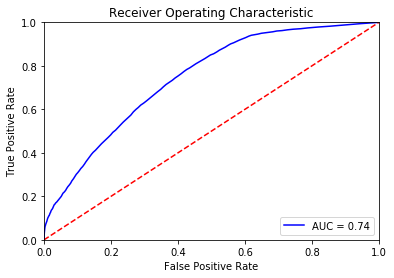

In [50]:
from sklearn.metrics import roc_curve
y_test= '1' <= y_test

fpr, tpr, threshold = roc_curve(y_test, predictions)
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Random forest Regressor  on the boostraped data  

In [51]:
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Train the model on training data
rf.fit(X_train_b, y_train_b);

In [52]:
predictions_b = rf.predict(X_test)

0.7347719750809347


Text(0.5, 0, 'False Positive Rate')

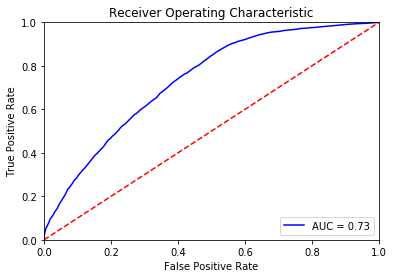

In [53]:
fpr, tpr, threshold = roc_curve(y_test, predictions_b )
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [136]:

#Do the confusion matrix in this case 

### Random forest classifier



## Tuning hyper parameters 

### The optim took 77 mins 

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0)

n_estimators = [10, 100, 200, 300]
max_depth = [8, 15, 25, 30]
min_samples_split = [2, 10, 15, 100]
min_samples_leaf = [1, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 60.3min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 77.6min finished


In [43]:
bestF

NameError: name 'bestF' is not defined

In [59]:
pred=gridF.predict(X_test)


In [57]:
pred[1:50]

array(['0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], dtype=object)

### Fitting the model

In [56]:

clf = RandomForestClassifier(n_estimators=200, random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf_b = RandomForestClassifier(n_estimators=200, random_state=0)
clf_b.fit(X_train_b, y_train_b)
predictions = clf_b.predict(X_test)

In [58]:
predictions_proba=clf.predict_proba(X_test)
predictions_proba[:,1]

array([0.02 , 0.46 , 0.35 , ..., 0.175, 0.085, 0.015])

In [59]:
predictions_proba_b=clf_b.predict_proba(X_test)
predictions_proba_b[:,1]

array([0.07 , 0.575, 0.425, ..., 0.47 , 0.145, 0.1  ])

0.7596199828627055
0.7493621637787724


Text(0.5, 0, 'False Positive Rate')

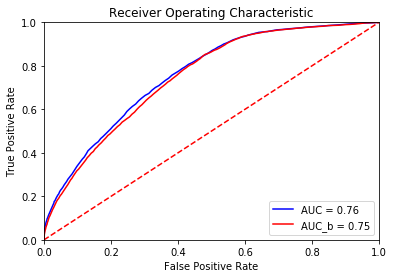

In [60]:
fpr, tpr, threshold = roc_curve(y_test, predictions_proba[:,1] )
fpr_b, tpr_b, threshold_b = roc_curve(y_test, predictions_proba_b[:,1] )

roc_auc = auc(fpr, tpr)
print(roc_auc)
roc_auc_b = auc(fpr_b, tpr_b)
print(roc_auc_b)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_b, tpr_b, 'r', label = 'AUC_b = %0.2f' % roc_auc_b)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [62]:
predictions= '1' <= predictions

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)


[[13075  4653]
 [ 1850  2528]]


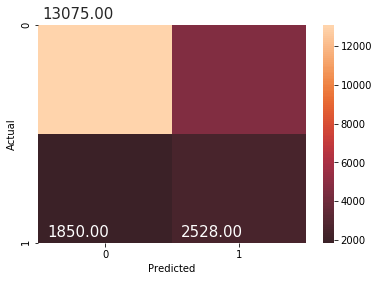

<Figure size 1440x1440 with 0 Axes>

In [63]:
# try to get the value at the bottom printed as well would be cool + there 

#cmn = conf_mat / conf_mat.astype(np.float).sum(axis=1)

import seaborn as sns
import numpy as np; np.random.seed(0)
import matplotlib.pylab as plt
import matplotlib.transforms

akws = {"ha": 'left',"va": 'top'}
ax = sns.heatmap(conf_mat,  annot=True, annot_kws={"size": 15},fmt='.2f',center=True)

for t in ax.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.2, -0.05,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.figure(figsize=(20,20))
plt.show()

### Boosting 

In [64]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [65]:
xgb_b_clf = XGBClassifier()
xgb_b_clf.fit(X_train_b, y_train_b)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [66]:
pred=xgb_clf.predict(X_test)
pred_b=xgb_b_clf.predict(X_test)

In [68]:
pred= '1' <= pred

conf_mat = confusion_matrix(y_test, pred)
print(conf_mat)

[[17724     4]
 [ 4361    17]]


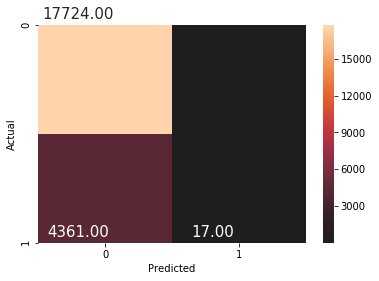

<Figure size 1440x1440 with 0 Axes>

In [69]:
#cm = conf_mat /conf_mat.astype(np.float).sum(axis=0)


akws = {"ha": 'left',"va": 'top'}
ax = sns.heatmap(conf_mat,  annot=True, annot_kws={"size": 15},fmt='.2f',center=True)

for t in ax.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.2, -0.05,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.figure(figsize=(20,20))
plt.show()

The problem with this model is that most of the predictions are 0 so not really useful in practice 

In [70]:
pred_b= '1' <= pred_b

conf_mat_b = confusion_matrix(y_test, pred_b)
print(conf_mat_b)

[[9856 7872]
 [ 929 3449]]


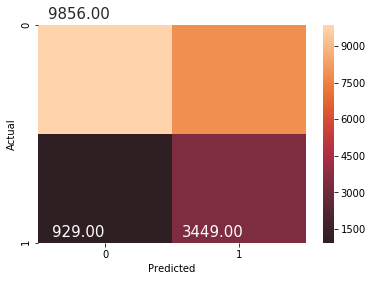

<Figure size 1440x1440 with 0 Axes>

In [71]:
#cm_b = conf_mat_b /conf_mat_b.astype(np.float).sum(axis=0) vmin=0, vmax=1 in ax 


akws = {"ha": 'left',"va": 'top'}
ax = sns.heatmap(conf_mat_b,  annot=True, annot_kws={"size": 15},fmt='.2f',center=True)

for t in ax.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.2, -0.05,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.figure(figsize=(20,20))
plt.show()

In [322]:
cm_b

array([[0.91437772, 0.69916869],
       [0.08562228, 0.30083131]])

## Parameter tuning for Xgboost 


In [72]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


from xgboost import XGBClassifier

In [73]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 2),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [74]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 5,
    cv = 5,
    verbose=True
)

### reduction of the numbers of features for this problem


In [75]:
X_train = X_train.drop(X_train.columns[18:100], axis=1)
X_test = X_test.drop(X_test.columns[18:100], axis=1)
X_train.dtypes

PatientId        float64
AppointmentID    float64
Age                int64
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
differenceDay    float64
Year_S             int64
Month_S            int64
Day_S              int64
Hour               int64
Year_A             int64
Month_A            int64
Day_A              int64
Gender_0           uint8
DOW_S_0            uint8
DOW_S_1            uint8
DOW_S_2            uint8
DOW_S_3            uint8
DOW_S_4            uint8
DOW_S_5            uint8
DOW_A_0            uint8
DOW_A_1            uint8
DOW_A_2            uint8
DOW_A_3            uint8
DOW_A_4            uint8
DOW_A_5            uint8
dtype: object

In [76]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 54.7min


KeyboardInterrupt: 

In [77]:
grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

### Logistic regression 
basic model 

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
clf_b = svm.SVC()
clf_b.fit(X_train_b, y_train_b)
predictions_b = clf_b.predict(X_test)


In [ ]:
conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)

In [ ]:
conf_mat_b = confusion_matrix(y_test, predictions_b)
print(conf_mat_b)

In [ ]:
akws = {"ha": 'left',"va": 'top'}
ax = sns.heatmap(conf_mat_b,  annot=True, annot_kws={"size": 15},fmt='.2f',center=True)

for t in ax.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.2, -0.05,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.figure(figsize=(20,20))
plt.show()

### Tuned SVM 